In [1]:
import pandas as pd
import numpy as np
import datetime
import os
import scripts.f1_scripts  as f1
from collections import defaultdict


In [13]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

def assign_color(tire):
    colors = {'Ultra': 'm', 'Super': 'r', 'Soft': 'y', 'Medium': 'w', 'Hard': 'k', 'Intermediate': 'g'}
    return colors[tire]

def assign_ordinal(tire):
    vals = {'Ultra': 1, 'Super': 2, 'Soft': 3, 'Medium': 4, 'Hard': 5, 'Intermediate': 5}
    return vals[tire]

In [3]:
# Load driver list as GLOBAL variable
DRIVER_LIST = pd.read_csv('data/drivers.csv')

In [4]:
def create_race_features(filename):
    year, race_num, track = filename.split('_')
    # Load lap times for all drivers
    lap_data = pd.read_csv('data/lap_history/{filename}_lap_history.csv'.format(filename=filename), header=None)
    lap_times = f1.assign_lap(lap_data)
    lap_times['TIME'] = f1.convert_time(lap_times['TIME'])
    lap_times.sort_values(by=['NO', 'LAP'], inplace=True)
    lap_times['LAP'] = lap_times['LAP'].astype(int)

    # Load Tire strategy data
    tire_data = pd.read_csv('data/tire_strategy/{filename}.csv'.format(filename=filename))
    tire_strat = f1.get_tires(tire_data)

    # Join Driver, Name, No. to tire data and sort by No.
    tire_strat = pd.merge(DRIVER_LIST, tire_strat, on='NAME')
    tire_strat.drop(['NAME', 'DRIVER'], axis=1, inplace=True)

    # Append tire data to lap data
    mask = tire_strat.iloc[:,1:].notnull().values
    lap_times['TIRE'] = tire_strat[tire_strat.columns[1:]].values[mask].flatten()
    lap_times['TRACK'] = track
    lap_times['YEAR'] = year
    lap_times['RACE'] = race_num
    lap_times['GAP'] = lap_times['GAP'].apply(lambda x: x.strip())

    return lap_times

In [23]:
lap_times = create_race_features('2016_2_bahrain')
lap_times['YEAR'] = lap_times['YEAR'].astype(int)
lap_times.reset_index(drop=True, inplace=False)
lap_times.head()

,NO,GAP,TIME,LAP,TIRE,TRACK,YEAR,RACE
3,3,3.102,102.560,1,Super,bahrain,2016,2
23,3,3.405,98.452,2,Super,bahrain,2016,2
43,3,4.906,99.232,3,Super,bahrain,2016,2
63,3,6.734,99.311,4,Super,bahrain,2016,2
83,3,8.585,99.514,5,Super,bahrain,2016,2


In [24]:
lap_times['SAFETY'] = lap_times.apply(lambda x: f1.assign_safety(x['TRACK'], x['YEAR'], x['LAP']), axis=1)


In [25]:
def get_stints(df):
    previous = None
    laps = []
    times = []
    tires = []
    stint = defaultdict(list)
    for row in df.iterrows():
        if row[1]['GAP'] == 'PIT':
            stint[row[1]['NO']].append([laps, times, tires])
            laps = []
            times = []
            tires = []
        elif previous == 'PIT':
            pass
        else:
            laps.append(row[1]['LAP'])
            times.append(row[1]['TIME'])
            tires.append(row[1]['TIRE'])
        previous = row[1]['GAP']
    return stint


In [26]:
lap_times[lap_times['NO'] == 9]

,NO,GAP,TIME,LAP,TIRE,TRACK,YEAR,RACE,SAFETY
16,9,10.206,109.664,1,Soft,bahrain,2016,2,0
34,9,14.965,102.908,2,Soft,bahrain,2016,2,0
54,9,17.688,100.454,3,Soft,bahrain,2016,2,0
74,9,20.728,100.523,4,Soft,bahrain,2016,2,0
94,9,23.946,100.881,5,Soft,bahrain,2016,2,0
114,9,26.882,100.690,6,Soft,bahrain,2016,2,0
132,9,29.981,100.886,7,Soft,bahrain,2016,2,0
150,9,32.959,100.786,8,Soft,bahrain,2016,2,0
167,9,35.607,100.822,9,Soft,bahrain,2016,2,0
186,9,39.577,102.267,10,Soft,bahrain,2016,2,0


In [18]:
stints = get_stints(lap_times)
stints[9]

[[[42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12],
  [96.095,
   96.235,
   96.532,
   96.964,
   96.839,
   96.949,
   96.986,
   96.906,
   97.314,
   97.211,
   97.214,
   97.551,
   97.927,
   97.819,
   97.552,
   98.01,
   109.664,
   102.908,
   100.454,
   100.523,
   100.881,
   100.69,
   100.886,
   100.786,
   100.822,
   102.267,
   100.767,
   100.858],
  ['Soft',
   'Soft',
   'Soft',
   'Soft',
   'Soft',
   'Soft',
   'Soft',
   'Soft',
   'Soft',
   'Soft',
   'Soft',
   'Soft',
   'Soft',
   'Soft',
   'Soft',
   'Soft',
   'Soft',
   'Soft',
   'Soft',
   'Soft',
   'Soft',
   'Soft',
   'Soft',
   'Soft',
   'Soft',
   'Soft',
   'Soft',
   'Soft']],
 [[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28],
  [98.584,
   98.429,
   99.434,
   99.6,
   99.689,
   99.647,
   100.798,
   99.712,
   99.924,
   99.861,
   100.714,
  

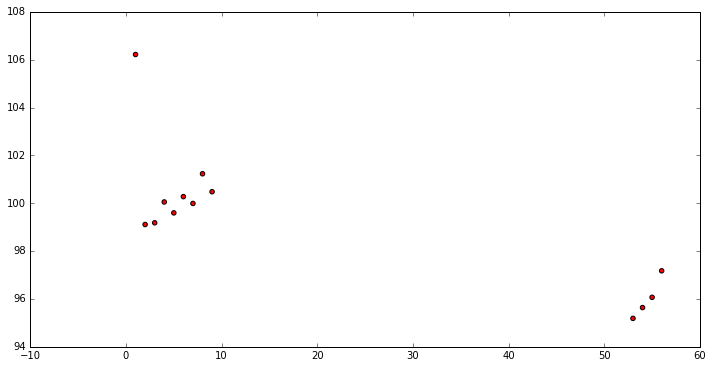

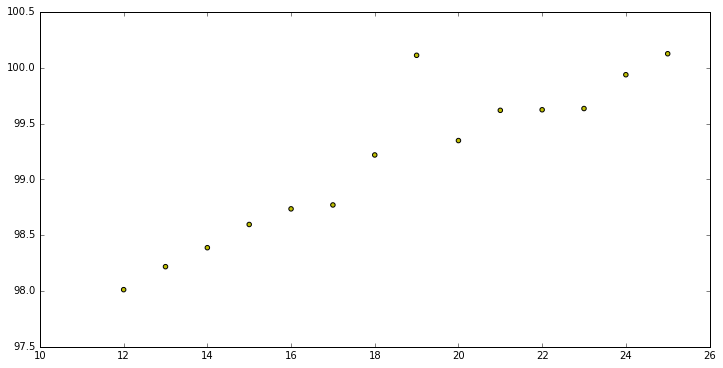

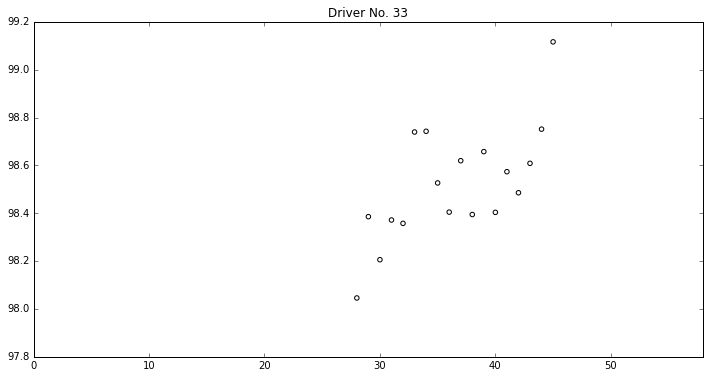

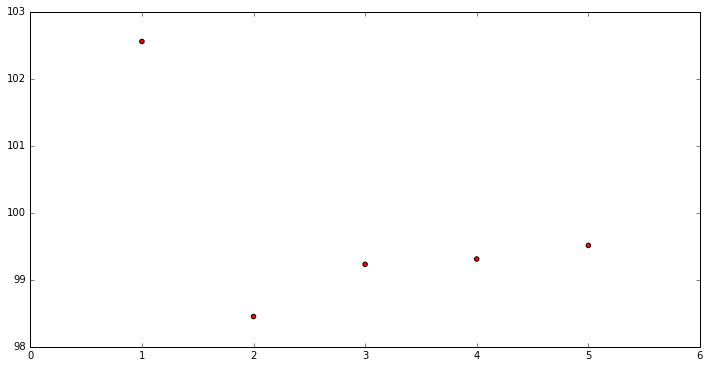

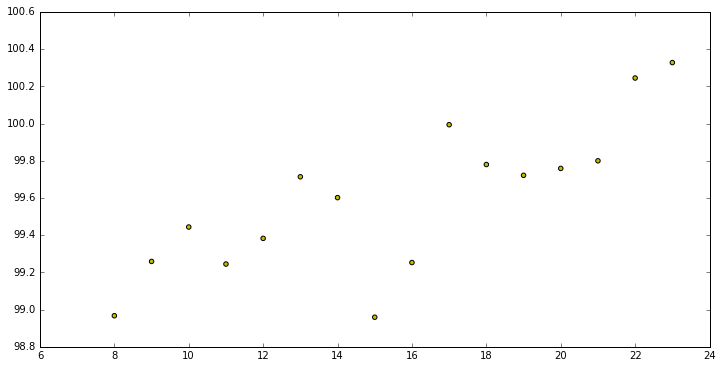

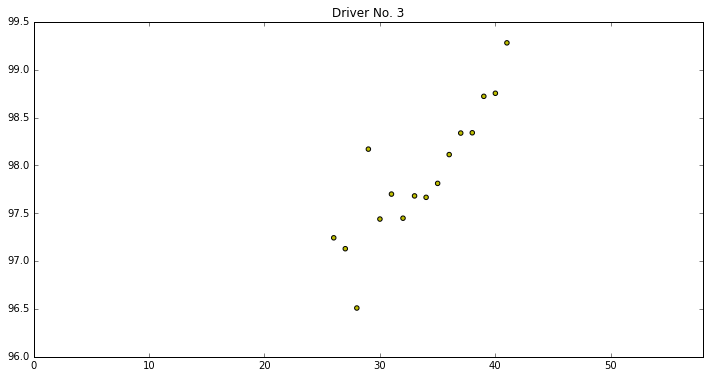

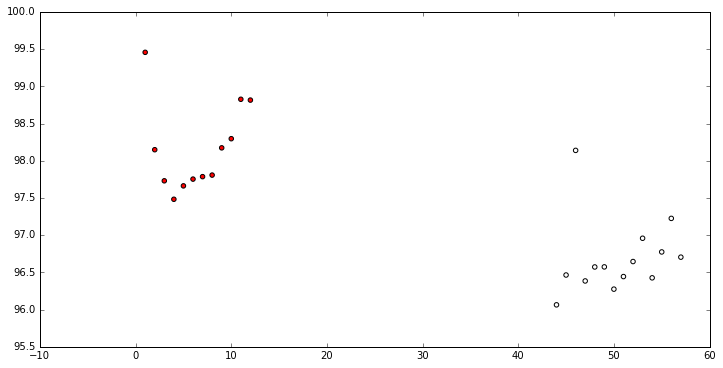

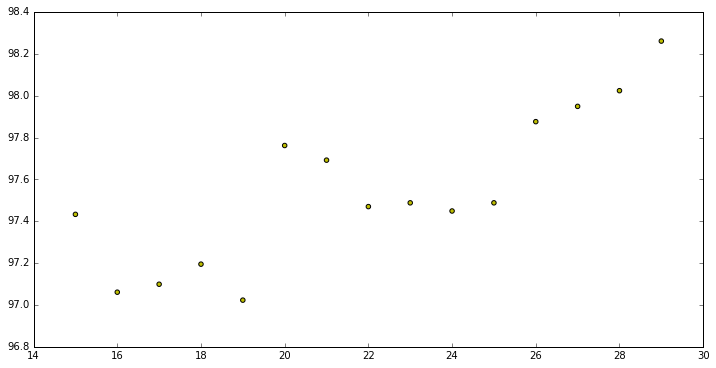

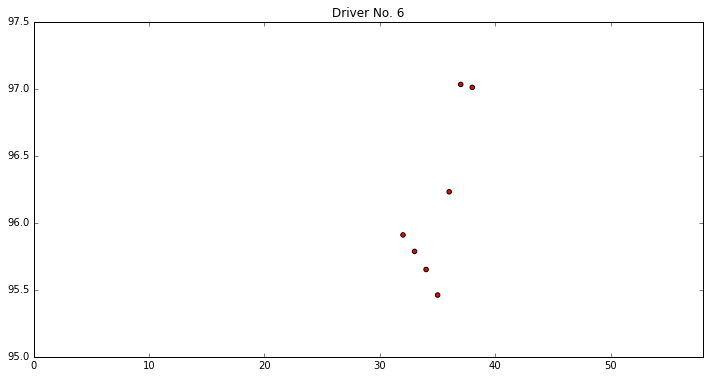

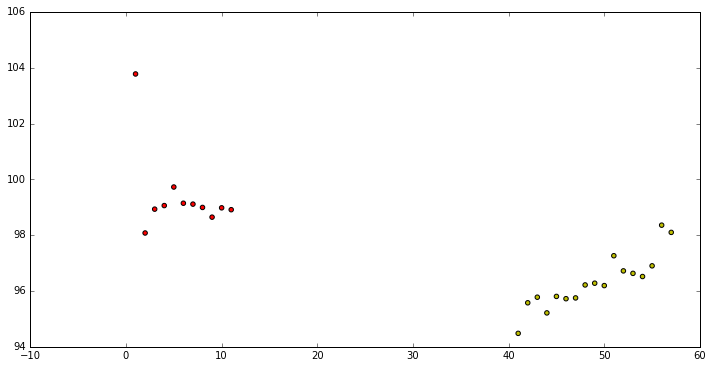

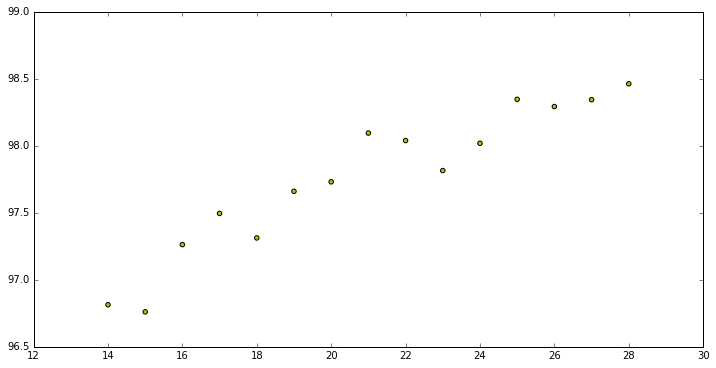

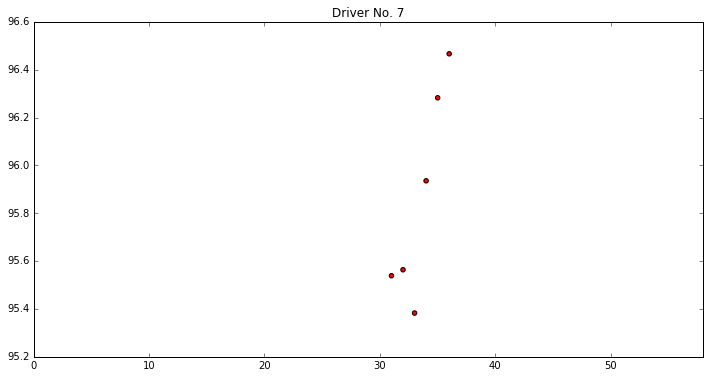

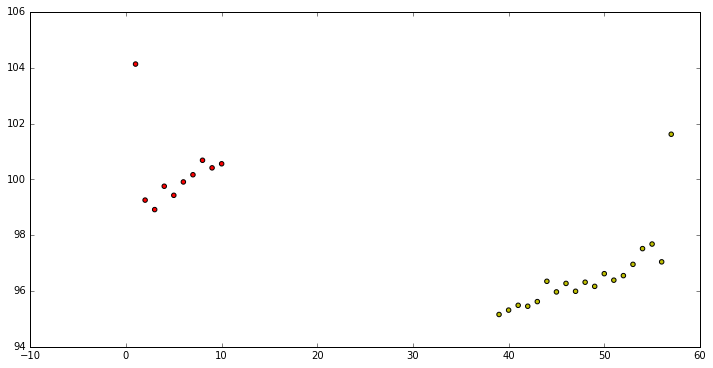

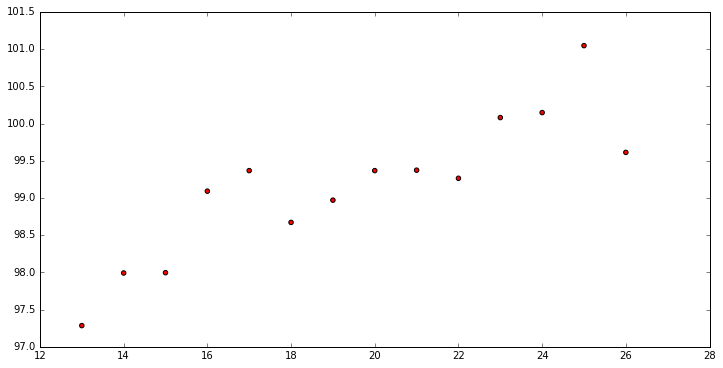

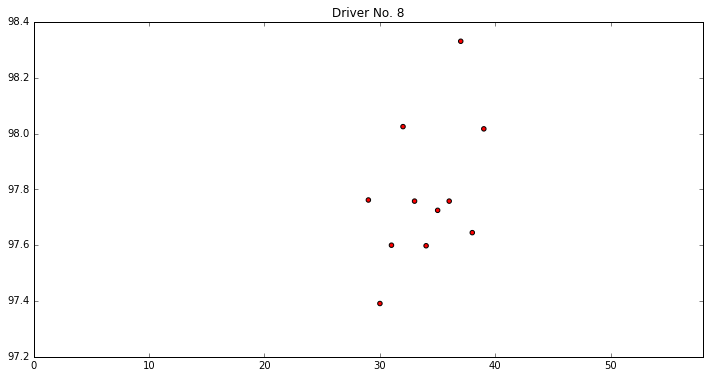

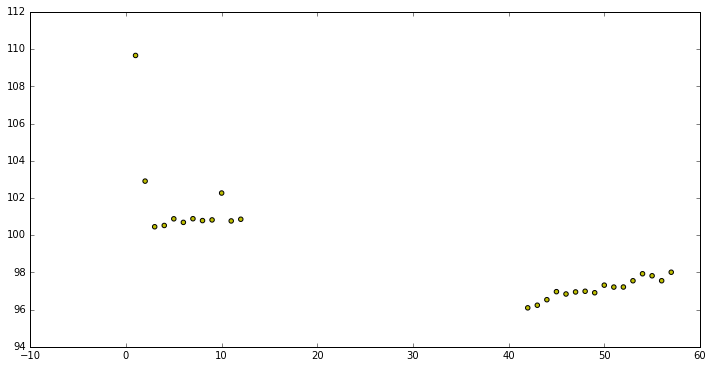

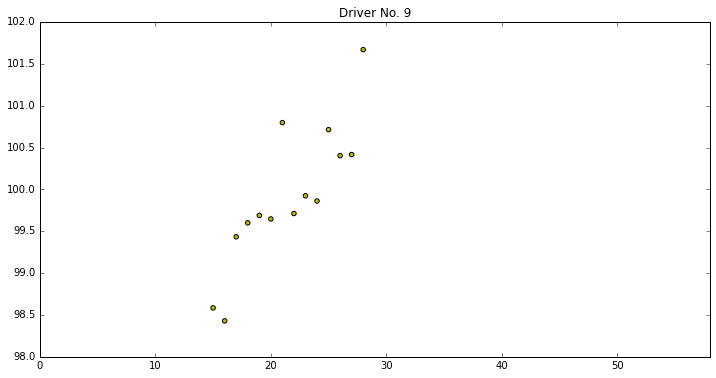

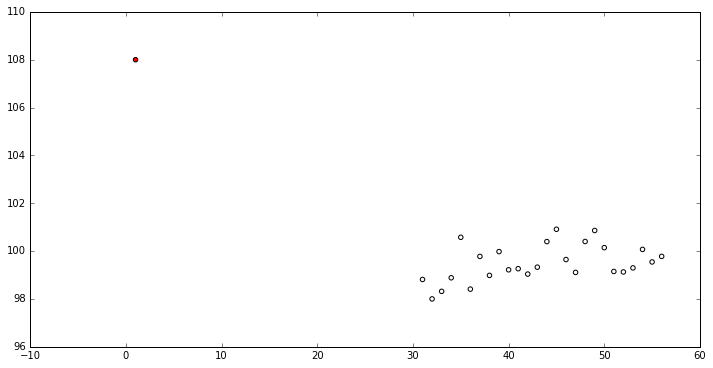

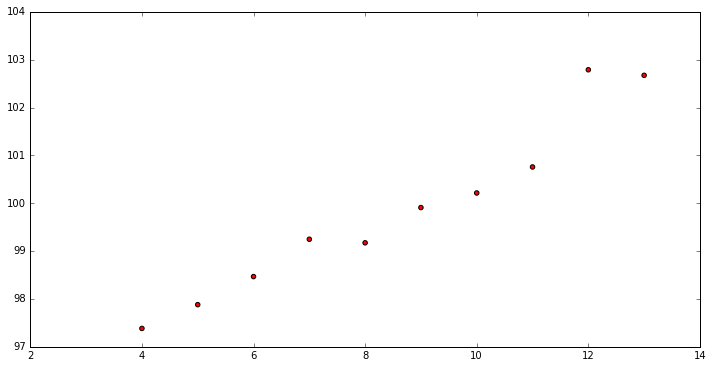

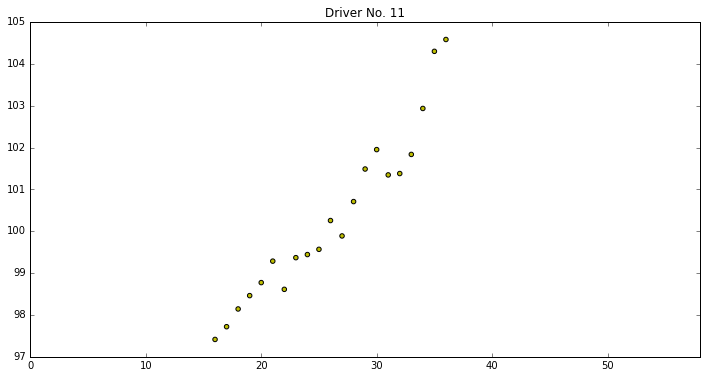

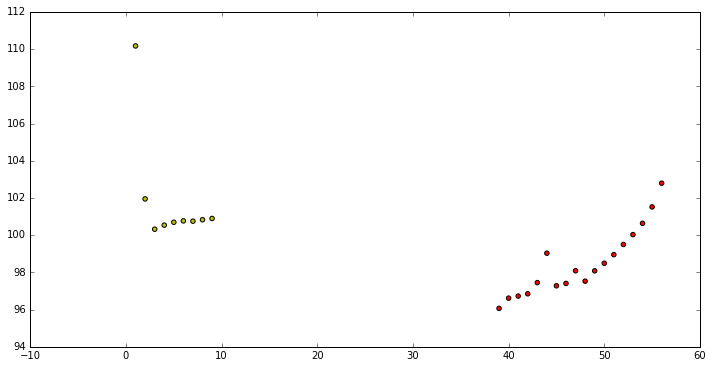

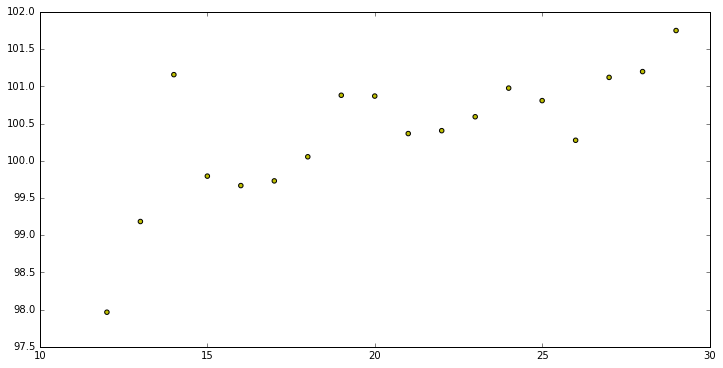

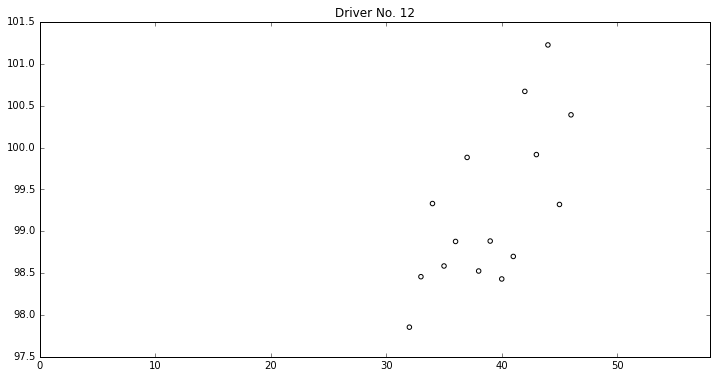

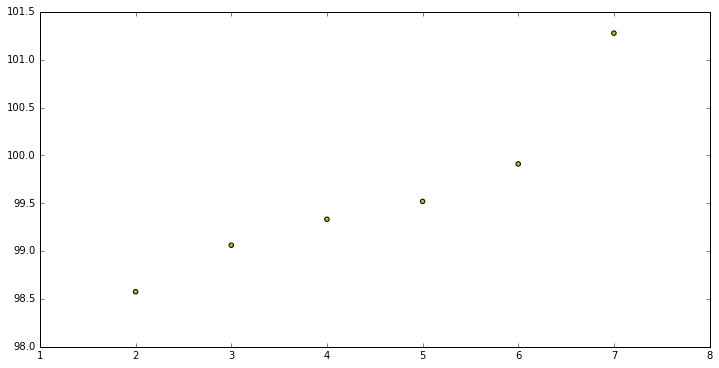

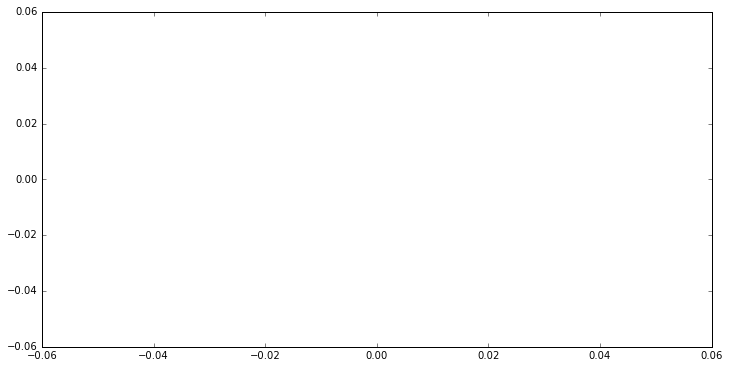

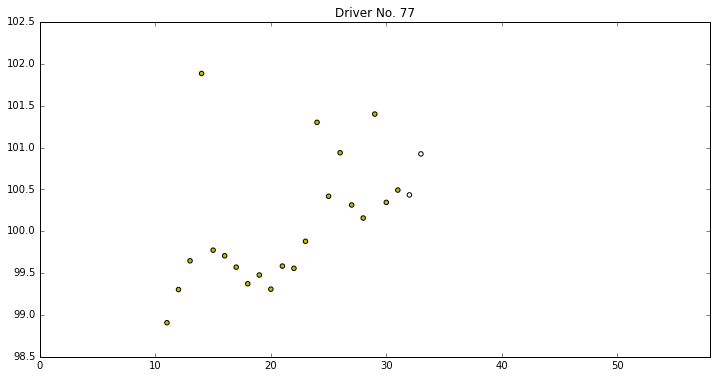

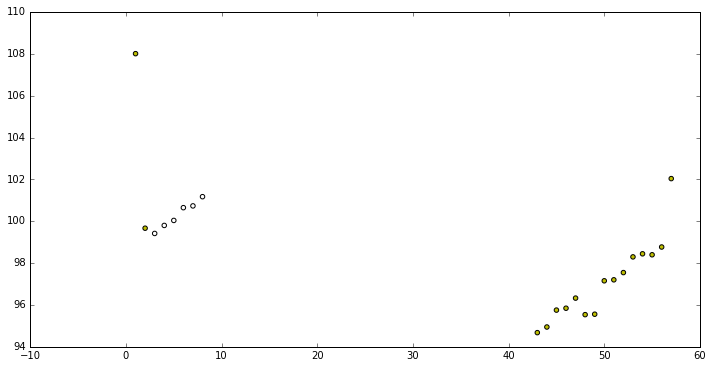

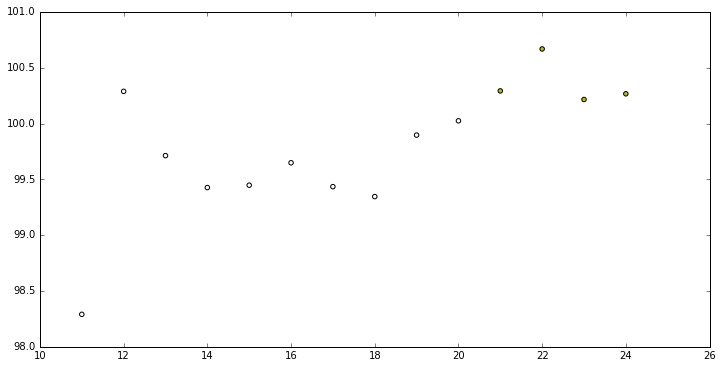

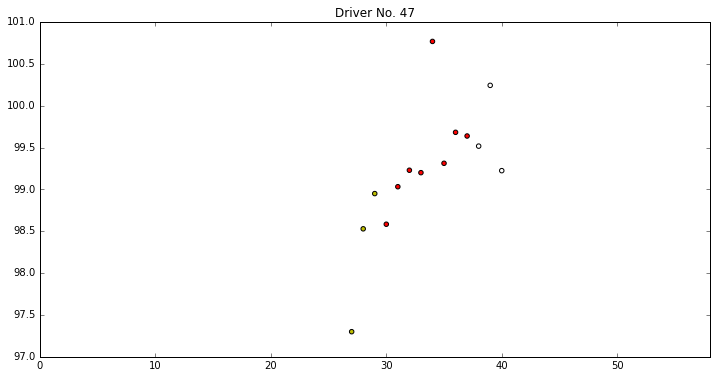

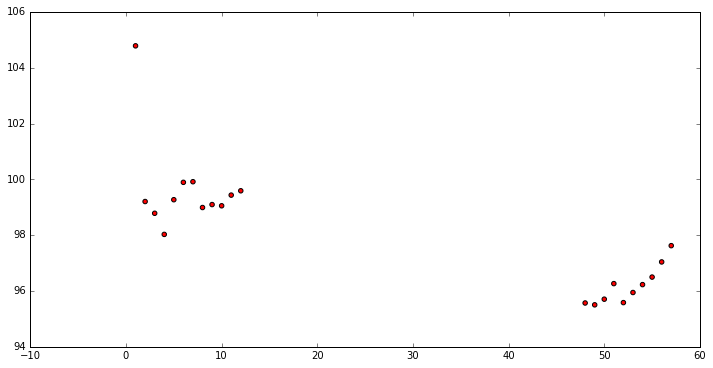

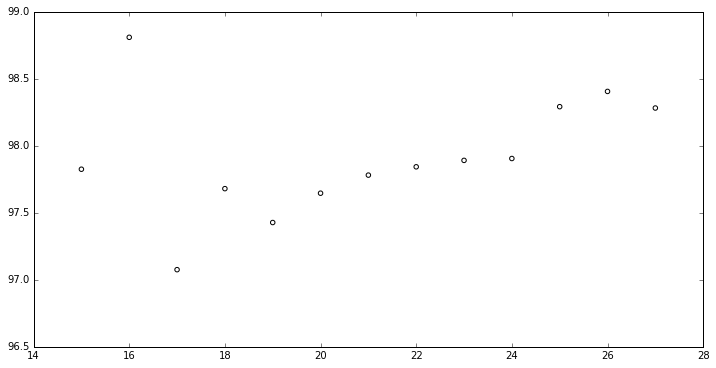

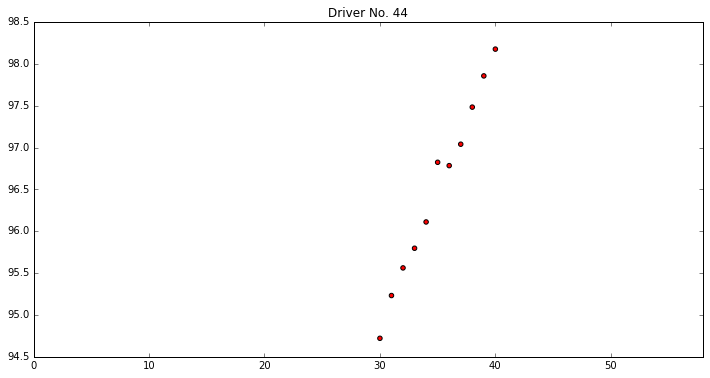

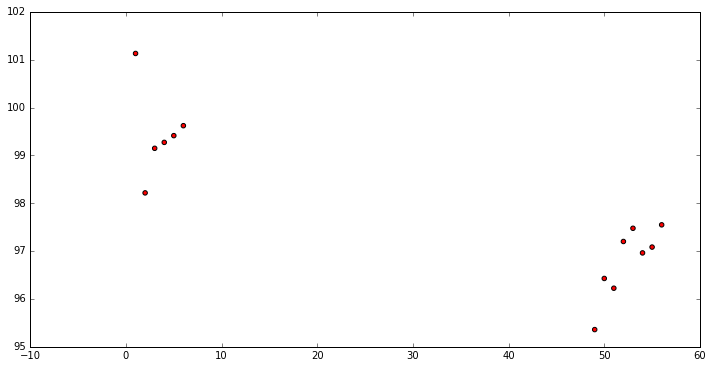

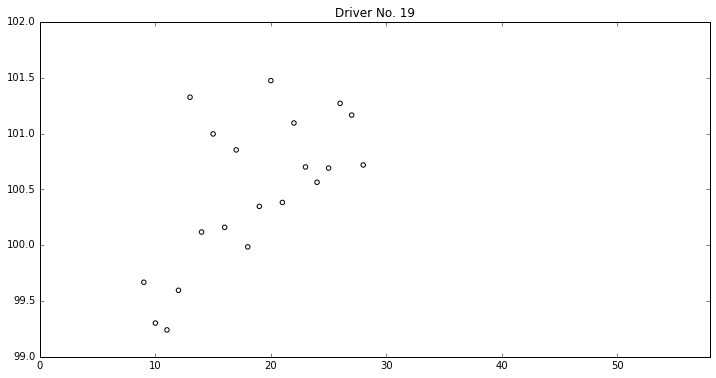

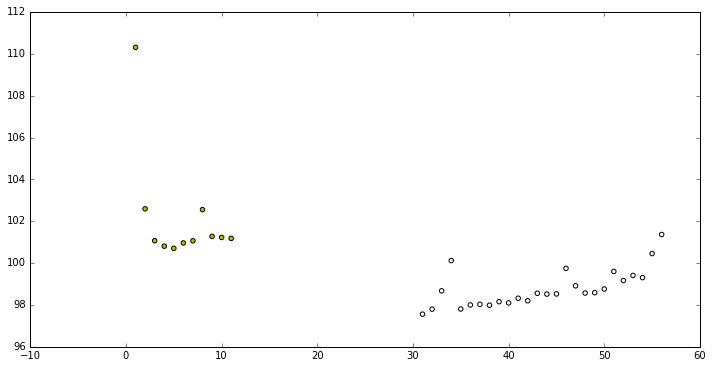

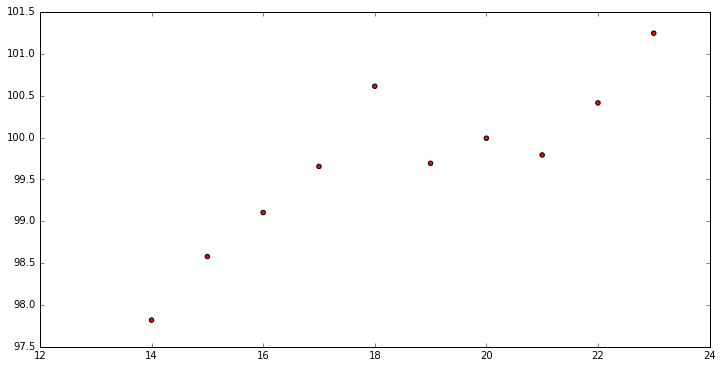

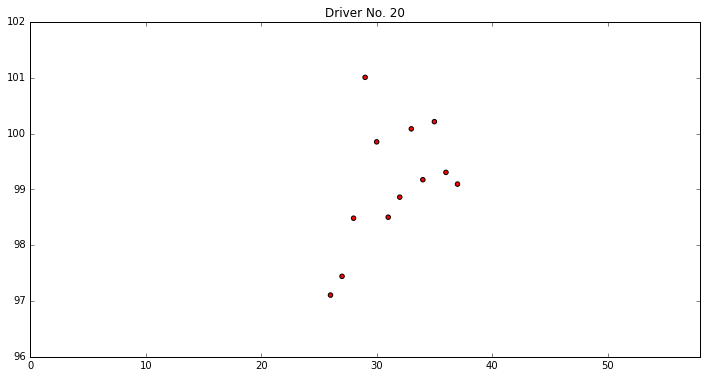

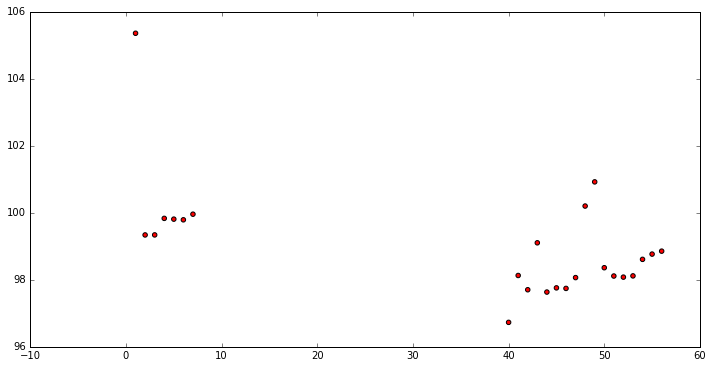

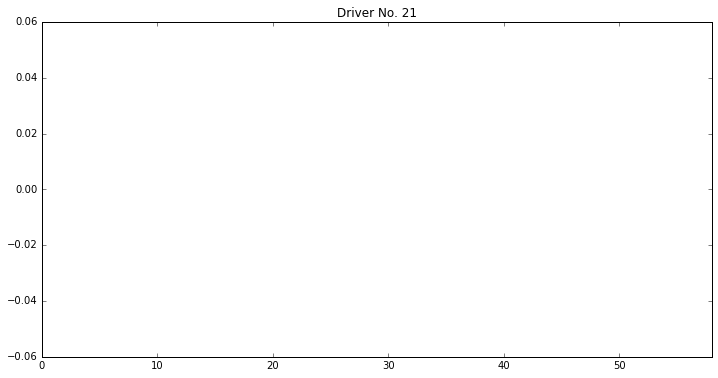

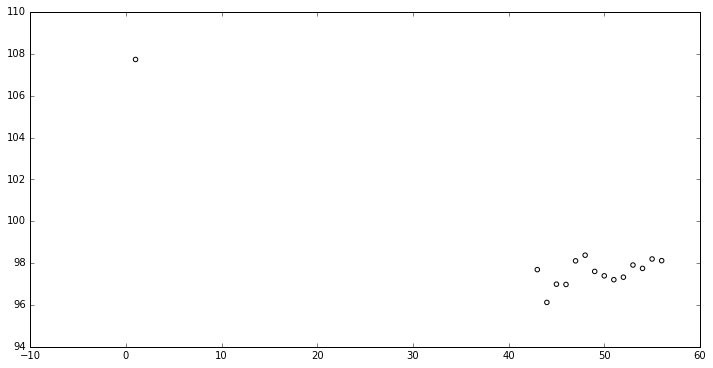

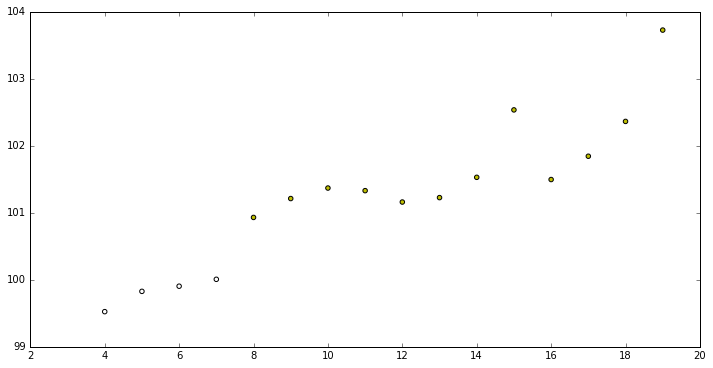

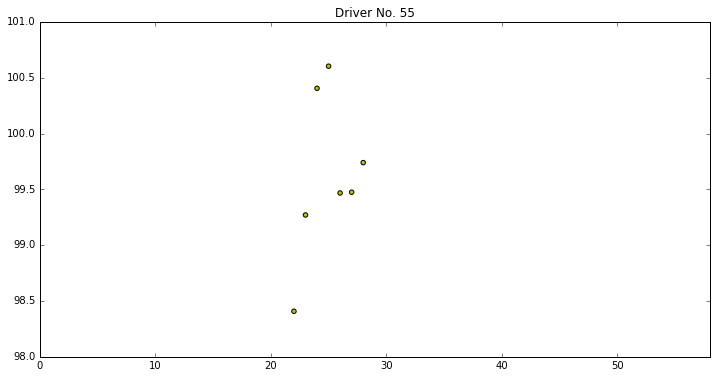

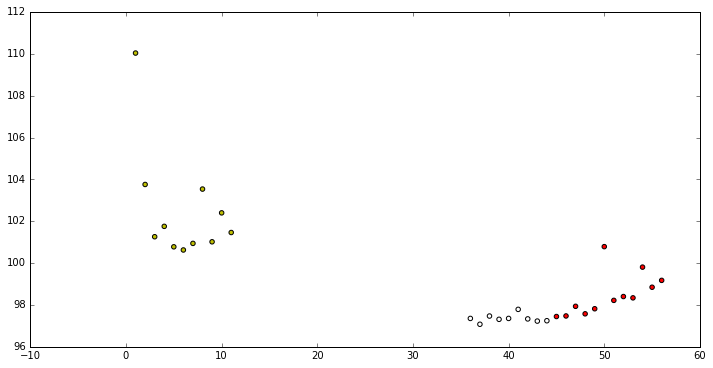

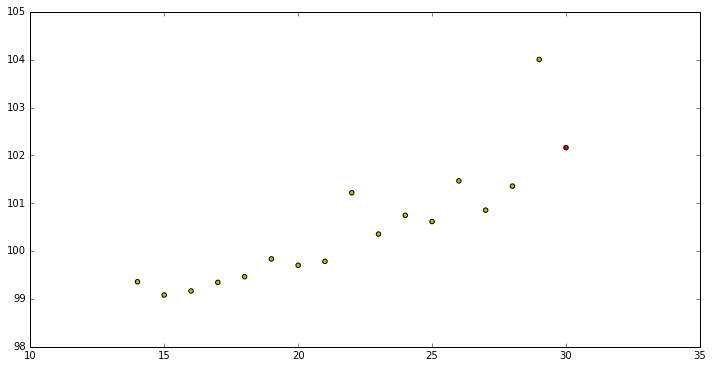

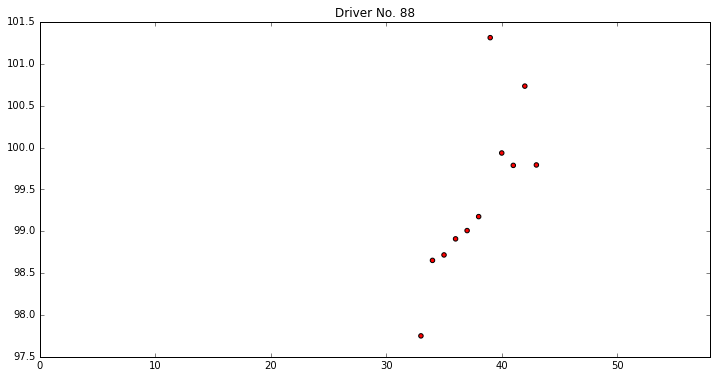

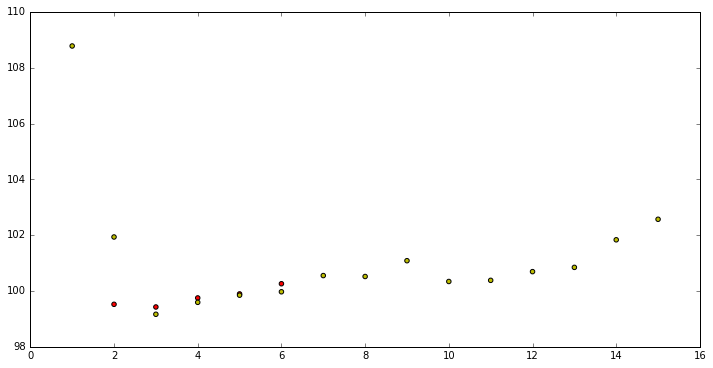

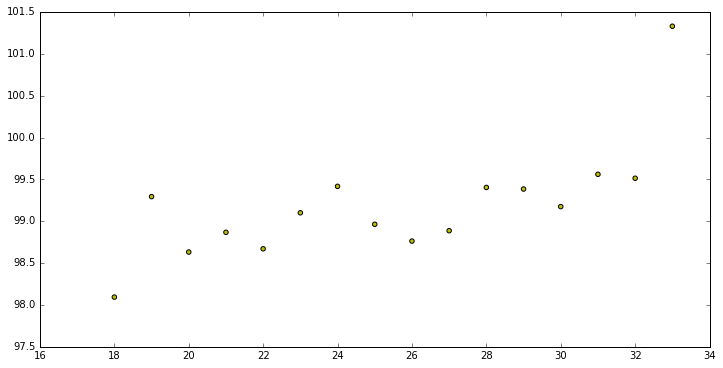

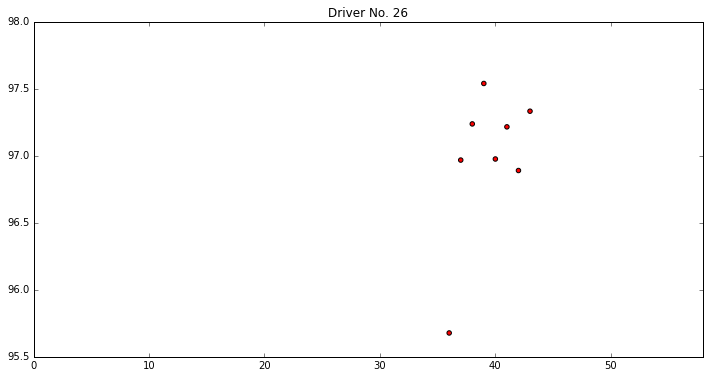

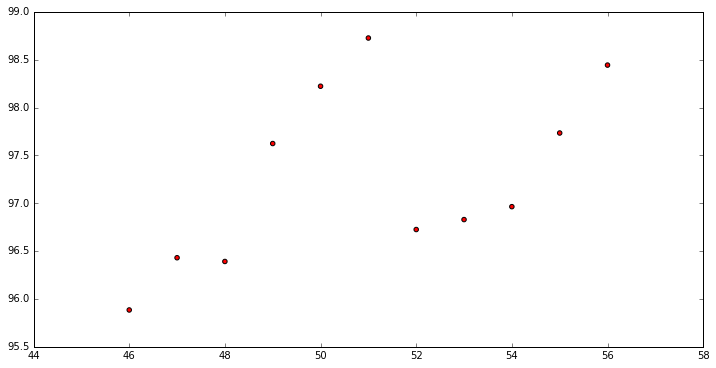

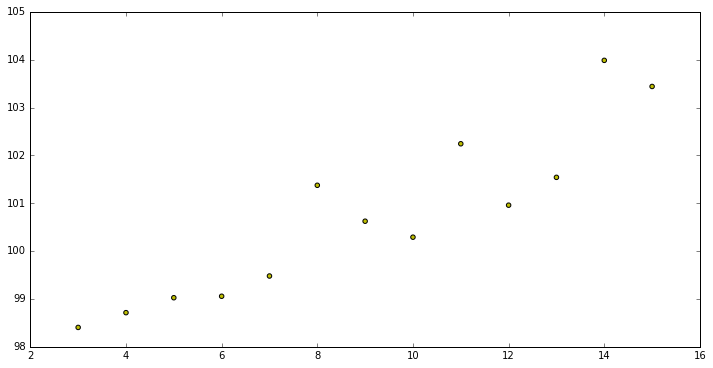

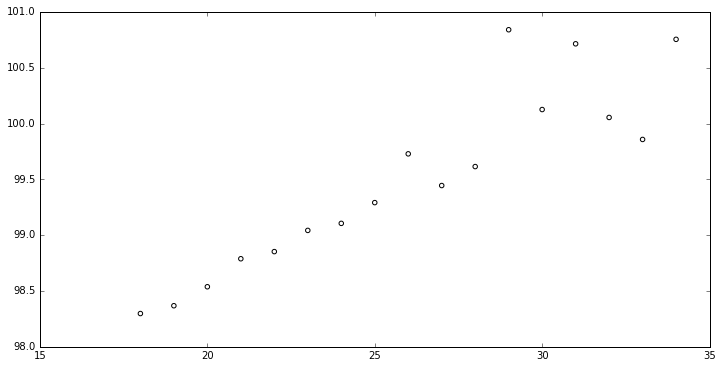

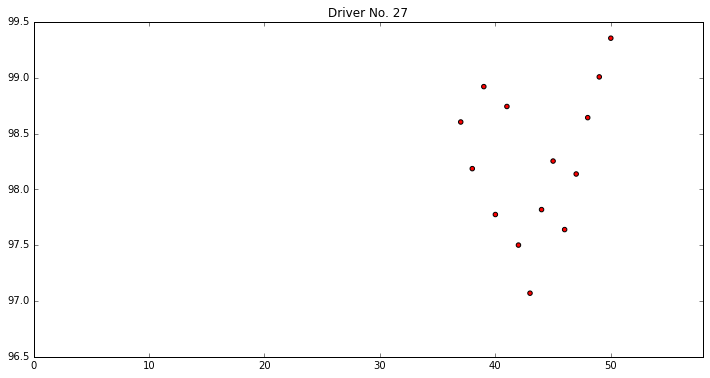

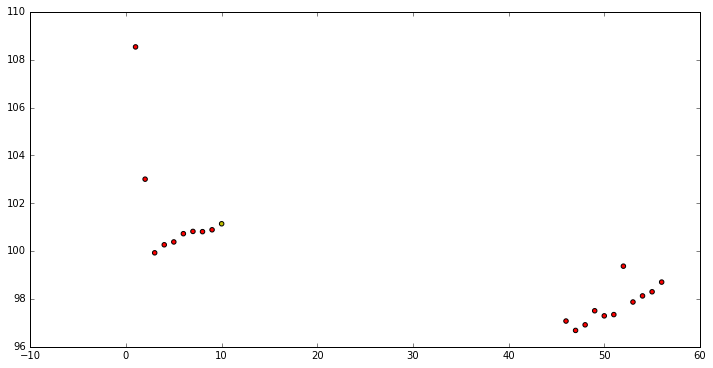

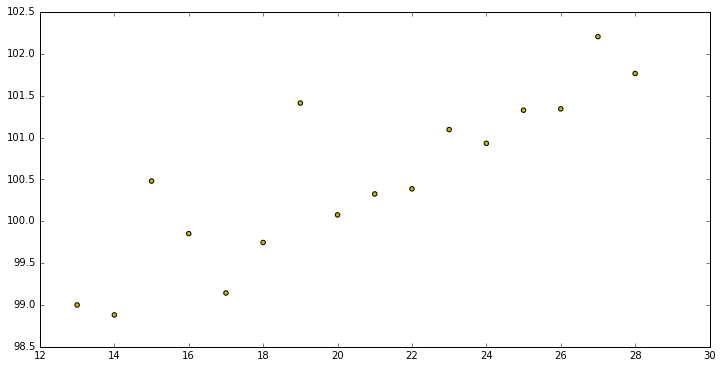

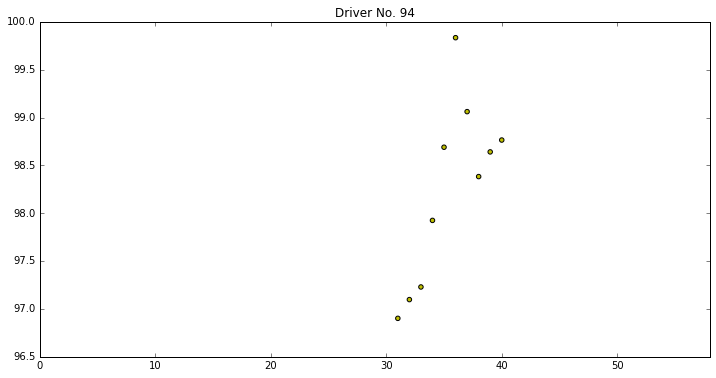

In [9]:
for driver, stint in stints.iteritems():
    for laps, time, tires in stint:
        colors = {'Ultra': 'm', 'Super': 'r', 'Soft': 'y', 'Medium': 'w', 'Hard': 'k', 'Intermediate': 'g'}
        
        fig = plt.figure(figsize=(12,6))
        ax1 = fig.add_subplot(111)
        plt.scatter(laps, time, c=map(lambda x: colors[x], tires), alpha=1)
    plt.xlim([0, lap_times['LAP'].max() + 1])
    plt.title('Driver No. {}'.format(driver))
    plt.show()
    

In [ ]:
tires = ['Soft', 'Soft', 'Soft', 'Soft', 'Super']
colors = {'Ultra': 'm', 'Super': 'r', 'Soft': 'y', 'Medium': 'w', 'Hard': 'k', 'Intermediate': 'g'}


In [ ]:
map(lambda x: colors[x], tires)

In [ ]:
plt.plot(lap_times['LAP'][lap_times['NO'] == 3], lap_times['TIME'][lap_times['NO'] == 3])
plt.plot(lap_times['LAP'][lap_times['NO'] == 6], lap_times['TIME'][lap_times['NO'] == 6])


In [ ]:
lap_times['LAP'][lap_times['NO'] == 3]

In [ ]:
stints[9][1]

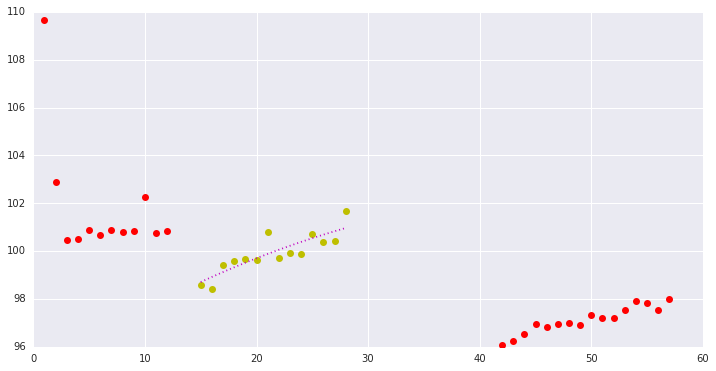

In [27]:
x = stints[9][1][0]
y = stints[9][1][1]

x2 = stints[9][0][0]
y2 = stints[9][0][1]

fit = np.polyfit(x, y, 2)
fit_fn = np.poly1d(fit) 
x_fit = np.linspace(15 , 28, 100)

plt.figure(figsize=(12,6))
plt.plot(x, y, 'yo', x_fit, fit_fn(x_fit), ':m')
plt.plot(x2, y2, 'ro')
